In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import itertools
from astropy.io import fits
import scipy
import pymaster as nmt
from planck_util import *

In [3]:
ps = PlanckSpectra()
f1, f2 = '143', '143'
Cb = ps.compute(f1, f2, '2', '1')

/home/zequnl/anaconda3/lib/python3.6/site-packages/healpy/fitsfunc.py:371: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  warnings.warn("No INDXSCHM keyword in header file : " "assume {}".format(schm))


KeyboardInterrupt: 

In [ ]:
fig, axes = plt.subplots(3,1,figsize=(12,14))

for spec, ax in zip(['TT', 'TE', 'EE'], axes):
    lmin_,lmax_,l_ref,cl_ref,error_ref=np.loadtxt('planck_spectra/spectra_' + f'{spec}_{f1}x{f2}' + '.dat',unpack=True)
    dl_ref_fac = l_ref*(l_ref+1)/(2*np.pi)
  
    ax.errorbar(l_ref,cl_ref*dl_ref_fac,
                error_ref*dl_ref_fac,
                fmt='.',label='%s'%f'{spec}_{f1}x{f2}', alpha=0.5)

    ax.plot(ps.lb, Cb[spec] * 1e12 ,'r.',label=r"NaMaster", alpha=0.5)

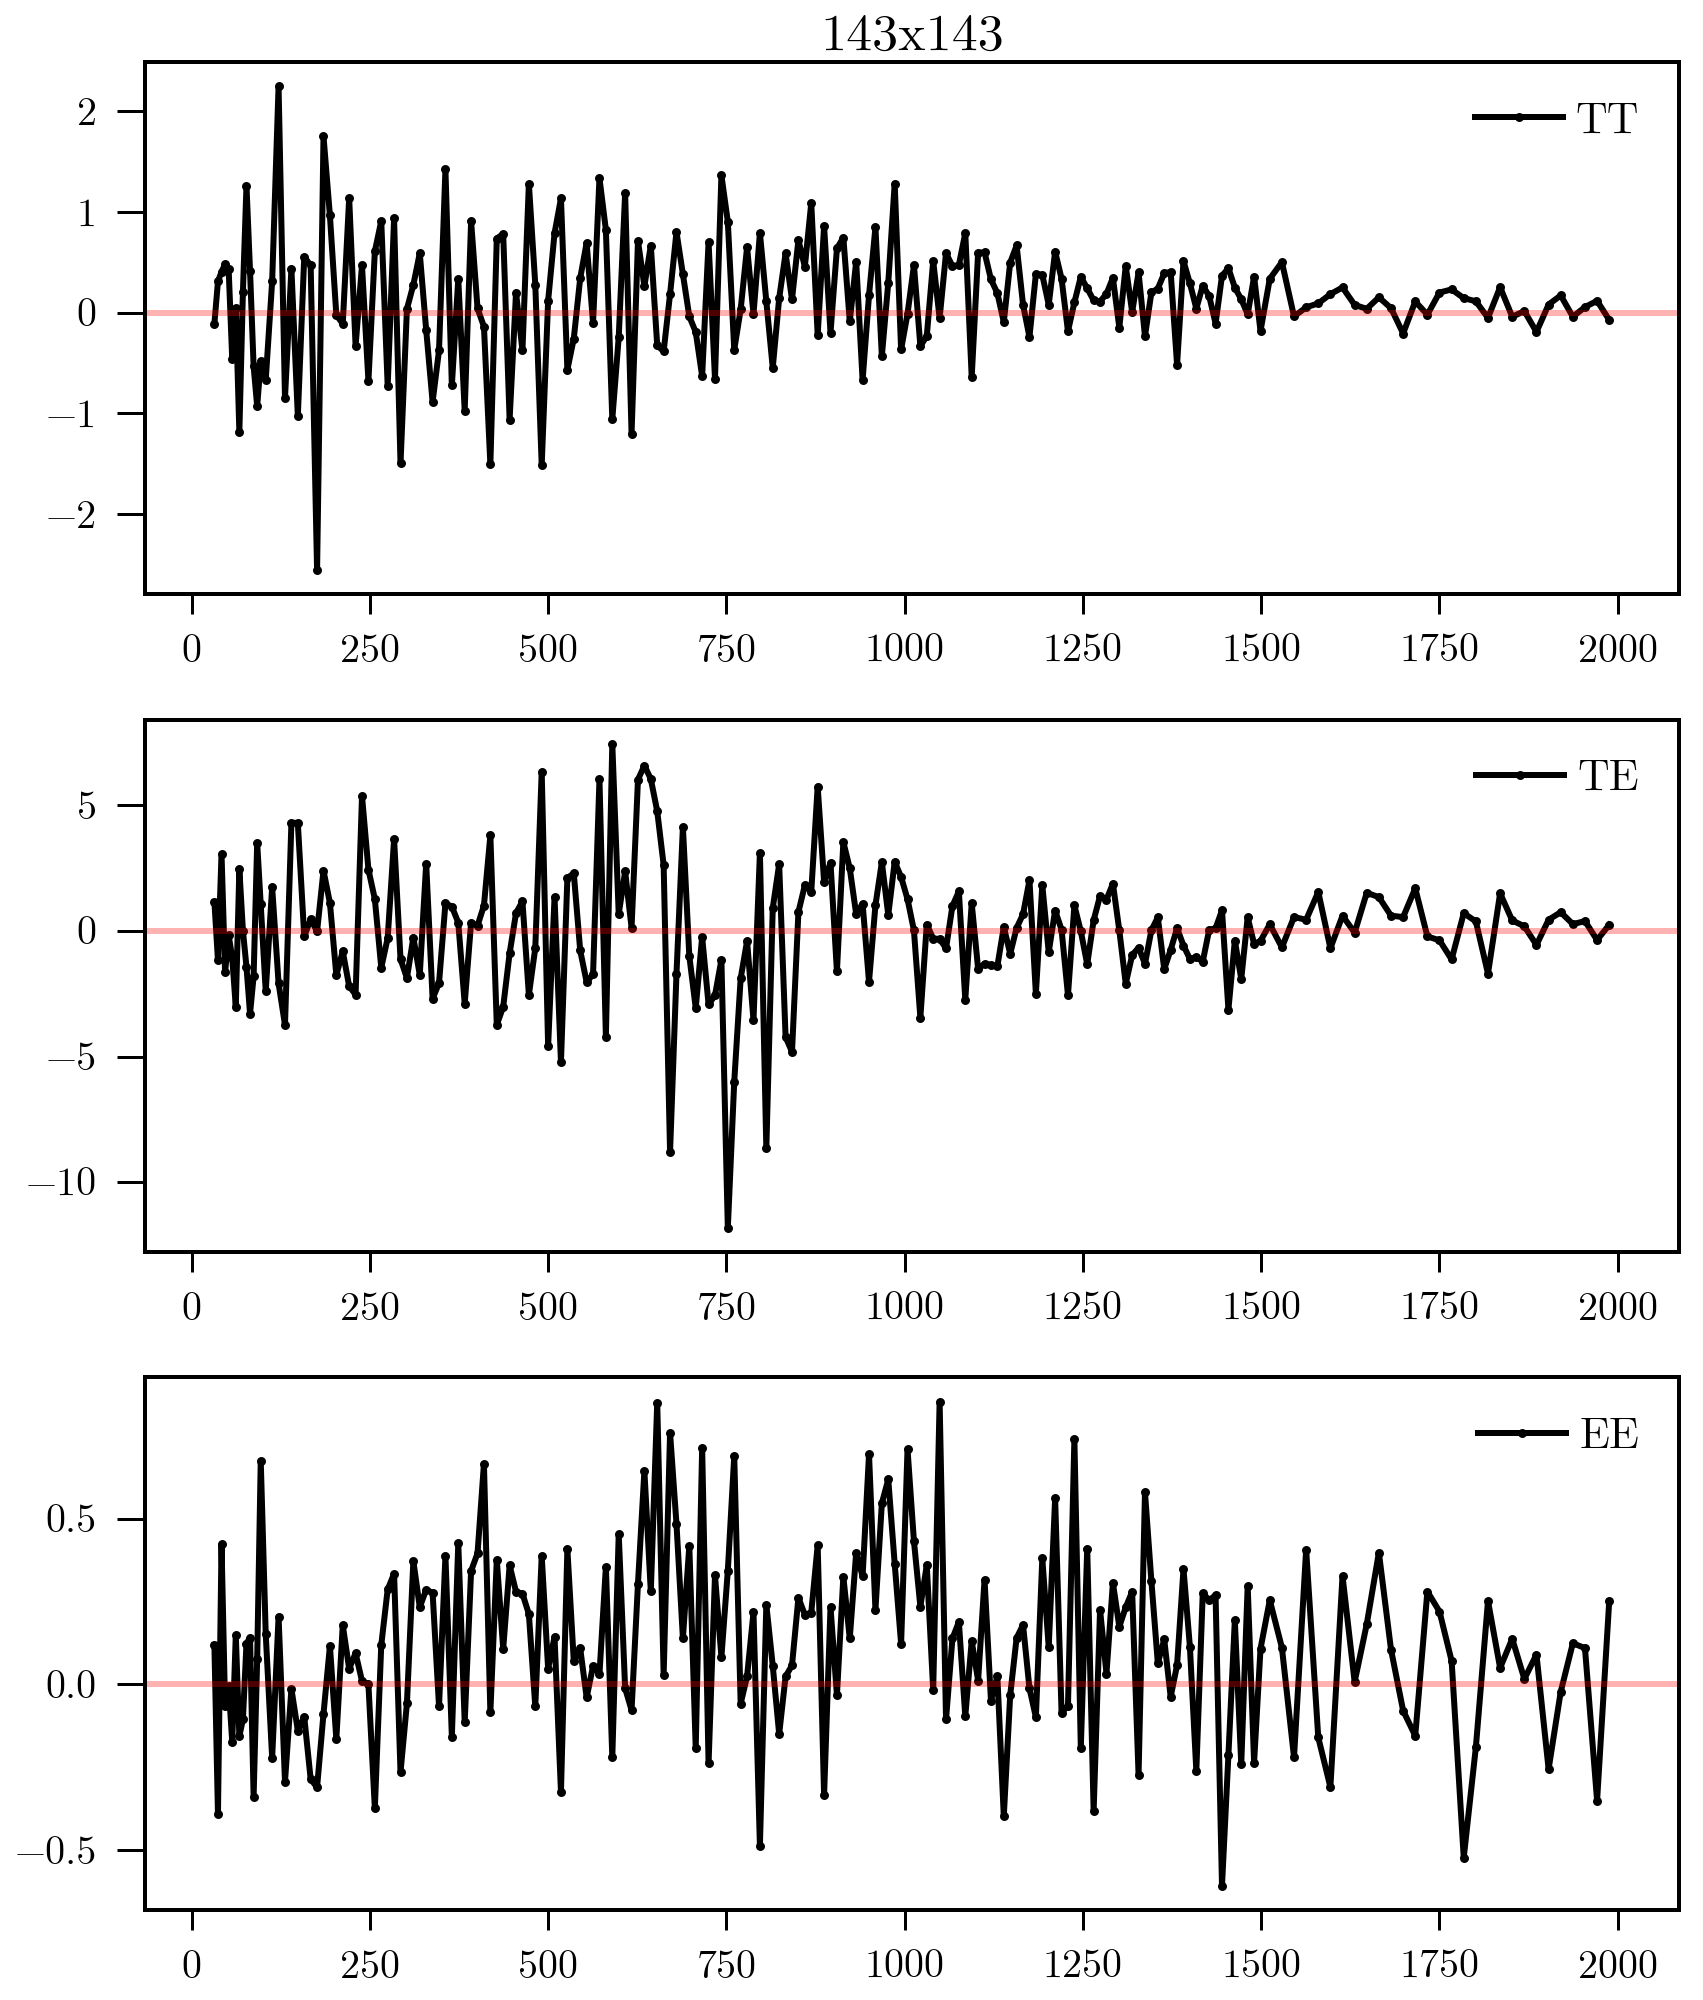

In [20]:
fig, axes = plt.subplots(3,1,figsize=(12,14))

for spec, ax in zip(['TT', 'TE', 'EE'], axes):
    lmin_,lmax_,l_ref,cl_ref,error_ref=np.loadtxt('planck_spectra/spectra_' + f'{spec}_{f1}x{f2}' + '.dat',unpack=True)
    dl_ref_fac = l_ref*(l_ref+1)/(2*np.pi)

    dl = np.interp(x=l_ref, xp=ps.lb, fp=Cb[spec] * 1e12) 
    ax.plot(l_ref, (dl - (cl_ref * dl_ref_fac)) / (error_ref * dl_ref_fac), 
            'k.-', label=spec)
    ax.axhline(0, color='red', alpha=0.3)
#     ax.set_ylim(-3,3)
    ax.legend()
    
axes[0].set_title(f'{f1}x{f2}')

plt.tight_layout()